# Jeremiah Lowhorn
## Assignment 5
## INFS 770
## 4/20/2019

In [35]:
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import community

In this assignment, you will need to conduct some network analysis on an Enron email data set. The text file “Email-Enron.txt” included in the assignment 4 folder contains the edge list of the communications. The description of the data set can be found at http://snap.stanford.edu/data/email-Enron.html. 
Please submit your codes and outputs in an iPython notebook.


In [4]:
# specify the file location
file_name = "Email-Enron.txt"

# read an edge list into a networkx graph
g = nx.read_edgelist(file_name, # file location
                     comments="#", # the character used to indicate the start of a comment
                     delimiter="\t", # the character that separates values in a line
                     create_using=nx.Graph() # create as undirected graph
                    )


Q1. Please write code to print the number of nodes and the number of edges in the entire network (use the method print nx.info(g)). Please write code to print the density of the network.

In [5]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 36692\nNumber of edges: 183831\nAverage degree:  10.0202'

In [6]:
print(nx.density(g))

0.00027309755503535


Q2. Please create a textbox and tell me: 1) What do the nodes and edges mean in this network? 2) Are the edges weighted? If so, what does the weight mean? 3) What does density of network mean? (you don’t need to write code for these questions)

1. The nodes are actual email addresses and the edges connect the email address together if at least one email was sent between the two. 

2. This is an unweighted network because the emails between the email addresses carry the same weight. 

3. Density is defined by the number of connections an email address has, divided by the number of connections, or emails they could have. In this case the density is very low which means that email addresses only receive emails from certain users.

Q3. Please write code to plot the degree histogram. Please create a textbox in which you try to interpret the histogram (hint: you must talk about the distribution shown in the histogram).

(array([3.2365e+04, 1.9470e+03, 7.9300e+02, 4.2200e+02, 2.9000e+02,
        1.8100e+02, 1.3000e+02, 1.0000e+02, 7.5000e+01, 5.8000e+01,
        4.4000e+01, 3.5000e+01, 3.8000e+01, 1.9000e+01, 1.4000e+01,
        2.2000e+01, 2.2000e+01, 1.1000e+01, 1.1000e+01, 7.0000e+00,
        1.0000e+01, 1.2000e+01, 1.0000e+01, 4.0000e+00, 7.0000e+00,
        0.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00, 2.0000e+00,
        5.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

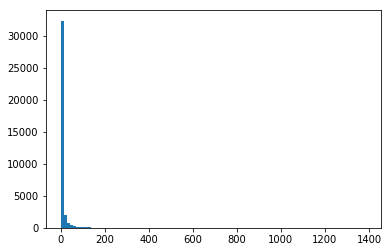

In [7]:
# degree histogram
# compute node degrees of a graph
degree = nx.degree(g)
plt.hist([y for (x, y) in degree], bins=100)

This histogram is clearly zero inflated and tailed to the right indicating that most of the email addresses received zero emails while some received many more. 

Q4. How many connected components are there in the network? How many nodes and edge are there in the largest component? 

In [8]:
#number of connected components
len([len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)])

1065

In [9]:
largest_cc = max(nx.connected_components(g), key=len)

In [10]:
#number of nodes in largest component
len(largest_cc)

33696

In [11]:
#number of edges in the largest component
max(nx.connected_component_subgraphs(g), key=len).number_of_edges()

180811

Q5. Write code to name the component having 16 nodes as comp_A (here you need to write a for loop to traverse the list of component and set comp_A to be the component with number_of_nodes()==16 ) and the component having 14 nodes as comp_B. Please write code to visualize comp_A and write code to visualize comp_B. 

In [12]:
components = list(nx.connected_component_subgraphs(g))
components

 ...]

In [16]:
for component in components:
    if component.number_of_nodes()==16:
        comp_A = component
    elif component.number_of_nodes()==14:
        comp_B = component

In [31]:
nx.density(comp_A)

0.49166666666666664

In [32]:
nx.density(comp_B)

0.14285714285714285

In [33]:
nx.degree(comp_A)

DegreeView({'34594': 10, '34597': 9, '34592': 11, '34602': 6, '34601': 6, '34590': 7, '34591': 7, '34596': 9, '34595': 7, '34593': 7, '34598': 9, '34600': 3, '34603': 6, '34589': 7, '34588': 7, '34599': 7})

In [34]:
nx.degree(comp_B)

DegreeView({'36142': 1, '36147': 1, '36146': 1, '36134': 1, '36138': 1, '36135': 13, '36136': 1, '36144': 1, '36143': 1, '36140': 1, '36137': 1, '36139': 1, '36141': 1, '36145': 1})

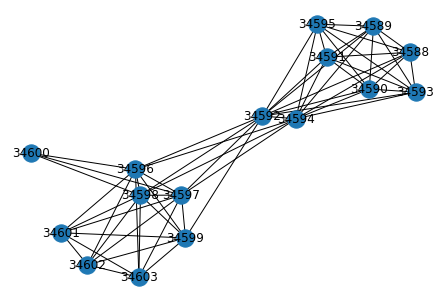

In [29]:
nx.draw_spring(comp_A, with_labels=True)

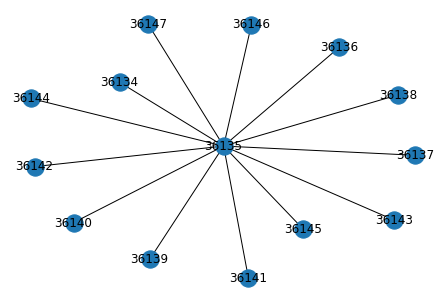

In [30]:
nx.draw_spring(comp_B, with_labels=True)

Q6. Please create a textbox to summarize the difference between comp_A and compB. You need to at least compare these two subgraphs with respect to average degree and density. You don’t need to write code for this task.

The density of comp A is much higher than that of B because all of the nodes in B only have ties to 36135 where the nodes in A have multiple ties which would increase the density. Comp B is a star graph with much higher degree than that of A. Each of hte nodes in B is centered on 36135 while A has various nodes that have multiple connections. 

Q7. Please write code to use the Louvain modularity method to detect communities within Component A with 16 nodes. Please visualize the different communities using different colors as I did in socialnet_example.ipynb. Please write code to print the number of communities you discovered.  

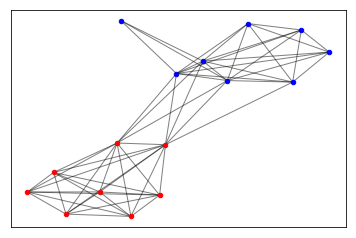

[('34594', 0), ('34597', 1), ('34592', 0), ('34602', 1), ('34601', 1), ('34590', 0), ('34591', 0), ('34596', 1), ('34595', 0), ('34593', 0), ('34598', 1), ('34600', 1), ('34603', 1), ('34589', 0), ('34588', 0), ('34599', 1)]


In [38]:
partition = community.best_partition(comp_A)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(comp_A)
count = 0
colors = ["r", "b", "k", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_A, pos, list_nodes, node_size = 20, node_color = colors[count])
    count += 1
nx.draw_networkx_edges(comp_A, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in comp_A.nodes()]
print(values)

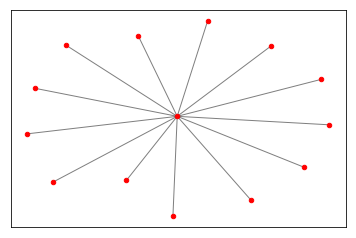

[('36142', 0), ('36147', 0), ('36146', 0), ('36134', 0), ('36138', 0), ('36135', 0), ('36136', 0), ('36144', 0), ('36143', 0), ('36140', 0), ('36137', 0), ('36139', 0), ('36141', 0), ('36145', 0)]


In [37]:
partition = community.best_partition(comp_B)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(comp_B)
count = 0
colors = ["r", "b", "k", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(comp_B, pos, list_nodes, node_size = 20, node_color = colors[count])
    count += 1
nx.draw_networkx_edges(comp_B, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in comp_B.nodes()]
print(values)

It is clear from the Louvain modularity that comp A has two distinct communities whereas the star graph in B only has one. 

Q8. Please write code to print the number of cliques in comp_A. Please write code to show the nodes in the largest clique.

In [47]:
#number of cliques
nx.graph_number_of_cliques(comp_A)

5

In [59]:
# find cliques
for cliq in nx.find_cliques(comp_A):
    print(cliq)

['34592', '34594', '34596', '34597', '34598']
['34592', '34594', '34590', '34591', '34588', '34589', '34595', '34593']
['34592', '34599', '34596', '34597', '34598']
['34602', '34597', '34601', '34599', '34603', '34596', '34598']
['34600', '34596', '34597', '34598']


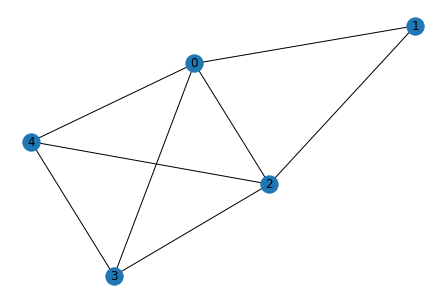

In [50]:
nx.draw_spring(nx.make_max_clique_graph(comp_A),with_labels=True)

In [52]:
nx.node_clique_number(comp_A)

{'34594': 8,
 '34597': 7,
 '34592': 8,
 '34602': 7,
 '34601': 7,
 '34590': 8,
 '34591': 8,
 '34596': 7,
 '34595': 8,
 '34593': 8,
 '34598': 7,
 '34600': 4,
 '34603': 7,
 '34589': 8,
 '34588': 8,
 '34599': 7}

The second clique with 34592, 34594, 34590, 34591, 34588, 34589, 34595, and 34593 is the largest clique amongst the 5 cliques in comp A.

Q9. Please create a textbox. Please tell me in the textbox which two nodes (people) in comp_A are likely to have similar opinions and why, and which two nodes in comp_A are likely to have different opinions and why. (you don’t need to write code for this)

34592 and 34594 are most likely to share the same opinion because both nodes are in two different cliques together. Both of those nodes are not in any of the cliques with 34602 and 34600 and are on different communities which would suggest they would not share the same opinions. 

Q10. Find important nodes in comp_A using at least three centrality measures. For each measure, please write code to print a datafame with two columns “node” and centrality (e.g., betweenness_centrality or closeness_centrality) and the dataframe needs to be sorted by the centrality measure in a descending order. Pease note you just need to run the centrality computations for comp_A rather than the whole network. It takes very long time to obtain the centrality measures for the whole network. Please create a textbox to summarize the results you obtained from the different centrality measures (you need to tell me if these different measures give similar results in identifying the most important people in the network; if not, why the results are different (here you cannot just say the results are different because I used different measures. You need to compare different measures and discuss their implications)). 



In [60]:
# compute node betweenness of a graph
between = nx.betweenness_centrality(comp_A)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

     node  betweenness
2   34592     0.271769
0   34594     0.187755
1   34597     0.106122
7   34596     0.106122
10  34598     0.106122
15  34599     0.031633
3   34602     0.000000
4   34601     0.000000
5   34590     0.000000
6   34591     0.000000
8   34595     0.000000
9   34593     0.000000
11  34600     0.000000
12  34603     0.000000
13  34589     0.000000
14  34588     0.000000


Betweenness centrality produces results that correspond to my answer in question 9; 34592 and 34594 are very similiar and different than 34602 and 34600. However, the betweenness of some of the nodes is reduced to zero even though the nodes are in the same clique as the two primary nodes. 

In [62]:
# compute node closeness of a graph
closeness = nx.closeness_centrality(comp_A)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness", ascending=False)
print(df_closeness)

     node  closeness
2   34592   0.789474
0   34594   0.750000
1   34597   0.714286
7   34596   0.714286
10  34598   0.714286
15  34599   0.652174
5   34590   0.555556
6   34591   0.555556
8   34595   0.555556
9   34593   0.555556
13  34589   0.555556
14  34588   0.555556
3   34602   0.500000
4   34601   0.500000
12  34603   0.500000
11  34600   0.454545


Closeness centrality produces similar results but gives a better sense of some of the less important nodes and their closeness to the primary nodes. These results suggest there are actually 4 nodes that are the furthest from the two primary with 34600 being the furthest. 

In [63]:
# compute node eigenvector centrality of a graph
eigen = nx.eigenvector_centrality(comp_A)

# convert it to pandas dataframe
df_eigen = pd.DataFrame(list(eigen.items()), columns=["node", "eigenvector centrality"])

# sort nodes by eivenvector centrality in descending order
df_eigen=df_eigen.sort_values("eigenvector centrality", ascending=False)
print(df_eigen)

     node  eigenvector centrality
2   34592                0.368005
0   34594                0.343403
1   34597                0.267535
7   34596                0.267535
10  34598                0.267535
5   34590                0.252391
6   34591                0.252391
8   34595                0.252391
9   34593                0.252391
13  34589                0.252391
14  34588                0.252391
15  34599                0.216954
3   34602                0.175224
4   34601                0.175224
12  34603                0.175224
11  34600                0.102653


The eigenvector centrality method again produces results that correspond to the second and first method, but like the second method gives a better sense of the actual closeness of the bottom nodes to the top nodes rather than reducing the value of centrality to zero as in method 1. 

In [64]:
# compute node PageRank centrality of a graph
pagerank = nx.pagerank_numpy(comp_A)

# convert it to pandas dataframe
df_pagerank = pd.DataFrame(list(pagerank.items()), columns=["node", "pagerank"])

# sort nodes by pagerank in descending order
df_pagerank=df_pagerank.sort_values("pagerank", ascending=False)
print(df_pagerank)

     node  pagerank
2   34592  0.087800
0   34594  0.080405
1   34597  0.076243
7   34596  0.076243
10  34598  0.076243
15  34599  0.060488
5   34590  0.058530
6   34591  0.058530
8   34595  0.058530
9   34593  0.058530
13  34589  0.058530
14  34588  0.058530
3   34602  0.053473
4   34601  0.053473
12  34603  0.053473
11  34600  0.030977


Just for fun, the page rank algorithm produces identical results to method 2 and 3. 